In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [29]:
# Load datasets
traffic_df = pd.read_csv('data/Traffic.csv')

In [30]:
traffic_df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [31]:
# 1. Distribution of vehicle counts for cars, bikes, buses, and trucks
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts", "Bike Counts", "Bus Counts", "Truck Counts"))

fig.add_trace(go.Histogram(x=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Histogram(x=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Histogram(x=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Histogram(x=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Distribution of Vehicle Counts', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Count")
fig.update_yaxes(title_text="Frequency")
fig.show(renderer="browser")

![output image](images/VehicleCounts.png)

In [32]:
# 3. Distribution of traffic situations
fig = px.pie(traffic_df, names='Traffic Situation', title='Traffic Situation Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation Distribution', title_x=0.5, template='plotly_white')
fig.show(renderer="browser")

![output image](images/TrafficSituations.png)

In [33]:
# 4. Vehicle count vary by day of the week
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Day", "Bike Counts by Day", "Bus Counts by Day", "Truck Counts by Day"))

fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Day of the Week', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Day of the Week")
fig.update_yaxes(title_text="Count")
fig.show(renderer="browser")

![output images](images/VehicleCountByDayOfWeek.png)

In [34]:
# 9. Total vehicle count by traffic situation
fig = px.box(traffic_df, x='Traffic Situation', y='Total', title='Total Vehicle Count by Traffic Situation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Total Vehicle Count by Traffic Situation', title_x=0.5, xaxis_title='Traffic Situation', yaxis_title='Total Count', template='plotly_white')
fig.show(renderer="browser")

![output images](images/VehicleCountByTrafficSituation.png )

In [35]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [36]:
# 11. Busiest hours of the day for traffic
traffic_df['Hour'] = pd.to_datetime(traffic_df['Time'], format='%I:%M:%S %p').dt.hour
fig = px.box(traffic_df, x='Hour', y='Total', title='Total Vehicle Count by Hour', color_discrete_sequence=['#9467bd'])
fig.update_layout(title_text='Total Vehicle Count by Hour', title_x=0.5, xaxis_title='Hour', yaxis_title='Total Count', template='plotly_white')
fig.show(renderer="browser")

![output images](images/TotalVehicleCountByHour.png)

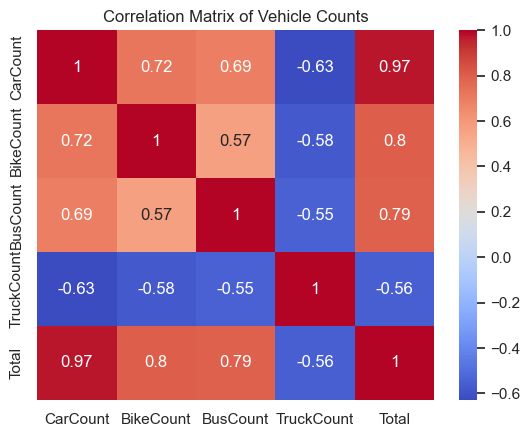

In [37]:
# 13. Correlations between different vehicle types
corr_matrix = traffic_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vehicle Counts')
plt.show()

In [38]:
# 16. Distribution of vehicle counts between weekdays and weekends
traffic_df['Weekend'] = traffic_df['Day of the week'].isin(['Saturday', 'Sunday'])
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Weekend", "Bike Counts by Weekend", "Bus Counts by Weekend", "Truck Counts by Weekend"))

fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Weekend', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Weekend")
fig.update_yaxes(title_text="Count")
fig.show(renderer="browser")


![output images](images/VehicleCountsByWeekend.png)

In [39]:
# 18. Distribution of traffic situations by hour
fig = px.box(traffic_df, x='Hour', y='Traffic Situation', title='Traffic Situation by Hour', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation by Hour', title_x=0.5, xaxis_title='Hour', yaxis_title='Traffic Situation', template='plotly_white')
fig.show(renderer="browser")

![output image](images/TrafficSituationByHour.png)

In [40]:
# 20. Distribution of total vehicle counts for each day of the week
fig = px.box(traffic_df, x='Day of the week', y='Total', title='Total Vehicle Count by Day of the Week', color_discrete_sequence=['#9467bd'])
fig.update_layout(title_text='Total Vehicle Count by Day of the Week', title_x=0.5, xaxis_title='Day of the Week', yaxis_title='Total Count', template='plotly_white')
fig.show(renderer="browser")

![output image](images/TotalvehicleCountByDayofWeek.png )

In [41]:
# 25. Peak traffic hours for each vehicle type
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Hour", "Bike Counts by Hour", "Bus Counts by Hour", "Truck Counts by Hour"))

fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Hour', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Hour")
fig.update_yaxes(title_text="Count")
fig.show(renderer="browser")

![output image](images/TotalvehicleCountByHour.png )

In [42]:
# 26. Average vehicle count for each type change over time
# Exclude non-numeric columns from the mean calculation
numeric_cols = traffic_df.select_dtypes(include=['number']).columns

# Group by 'Time' and calculate the mean for numeric c  olumns
avg_time_counts = traffic_df.groupby('Time')[numeric_cols].mean().reset_index()

# Create the line plot
fig = px.line(avg_time_counts, x='Time', y=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'], title='Average Vehicle Counts Over Time')
fig.update_layout(title_text='Average Vehicle Counts Over Time', title_x=0.5, xaxis_title='Time', yaxis_title='Average Count', template='plotly_white')

# Display the plot
fig.show(renderer="browser")

![output image](images/AverageVehicleCountOverTime.png )

In [43]:
# Identify and remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

vehicle_counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
combined_df = remove_outliers(traffic_df, vehicle_counts)

In [44]:
# Check for missing values and duplicates
print("Missing values in each column:")
print(combined_df.isnull().sum())

print(f"Number of duplicate rows: {combined_df.duplicated().sum()}")

Missing values in each column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Hour                 0
Weekend              0
dtype: int64
Number of duplicate rows: 0


In [45]:
# Prepare the features and target
X = combined_df.drop(columns=['Traffic Situation','BikeCount'])
y = combined_df['Traffic Situation']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Preprocessing pipeline for numeric and categorical features
numeric_features = ['CarCount', 'BusCount', 'TruckCount', 'Total']
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [48]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CarCount', 'BusCount',
                                                   'TruckCount', 'Total']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
# Make predictions
y_pred = model.predict(X_test)

In [50]:
# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9982758620689656
Classification Report:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       118
        high       0.98      1.00      0.99        61
         low       1.00      1.00      1.00        61
      normal       1.00      1.00      1.00       340

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580



In [51]:
# Check some predictions 
input_features = X_test.iloc[9].to_dict()
input_features_df = pd.DataFrame([input_features])

predicted_output = model.predict(input_features_df)
print(f"Input features: {input_features}")
print(f"Predicted output for input features: {predicted_output}")

Input features: {'Time': '8:15:00 AM', 'Date': 31, 'Day of the week': 'Tuesday', 'CarCount': 110, 'BusCount': 35, 'TruckCount': 0, 'Total': 179, 'Hour': 8, 'Weekend': False}
Predicted output for input features: ['heavy']


In [52]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']